## Varible parameters:
\begin{align}
    &(1)\psi(x,t) \to \psi_{j,n} \\
    &(2)\lambda = 2\epsilon^2 / \delta \\\\
    &\left\{ \begin{aligned}
    &(3)\Omega_{j,n} = -\psi_{j+1,n} + (i\lambda + \epsilon^2 V_{j} + 2)\psi_{j,n} -\psi_{j-1,n} \\
    &(4)e_j = 2+\epsilon^2 V_j - i\lambda -\frac{1}{e_{j-1}} \\
    &(5)f_{j,n} = \Omega_{j,n} + \frac{f_{j-1,n}}{e_{j-1}} \\
    \end{aligned} \right.\\
    &(6)e_1 = 2 + \epsilon^2 V_1 -i\lambda \\
    &(7)f_{1,n} = \Omega_{1,n}\\\\
    &(8)\psi_{J-1,n+1} = -\frac{f_{J-1,n}}{e_{J-1}}\\
    &(9)\psi_{j,n+1} = \frac{\psi_{j+1,n+1}-f_{j,n}}{e_j}\\
\end{align}

## Algorism:
1. calculate $e_j(j=1,2,...J-1)$ using (4) and (6)

$n = 0$

0.1. calculate $\Omega_{j,0} (j=1,2,...J-1)$ using (3)

0.2. calculate $f_{1,0}$ using (7)

0.3.calculate $f_{j,0}(j=2,3,...J-1)$ using (5)

0.4. calculate $\psi_{J-1,1}$ using (8)

0.5. calculate $\psi_{j,n+1}(j=J-2,J-3,...2,1)$ using (9)

$n = 1$

loop the above calcusion for n = 1,2,...N


In [31]:
import numpy as np
from matplotlib import pyplot as plt

## create a square-well potential

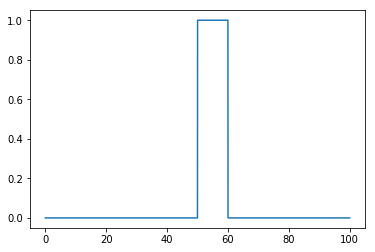

In [143]:
default_mesh = 100000

x = np.linspace(0,100,default_mesh)
def V_sq(mesh = default_mesh):
    V_sq = np.zeros(mesh)
    start = mesh//2
    end = start + round(mesh*(0.1))
    V_sq[start : end + 1] = 1
    return V_sq

plt.plot(x,V_sq())

define gaussian f(x) as $f(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{(x-x_0)^2}{2\sigma^2})$
\begin{align}
\end{align}

In [144]:
def wavePacket(x):
    return (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-((x-x_0)**2)/(2*sigma**2))


In [145]:
sigma = 1
x_0 = (1/4)*100

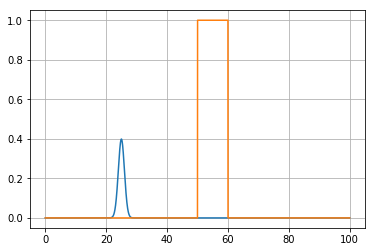

In [146]:
x1 = np.linspace(-0,100,default_mesh)
plt.plot(x1,wavePacket(x1))
plt.plot(x1,V_sq())
plt.grid()
plt.show()

\begin{align}
&\epsilon = 0.0008 \\
&\delta = 0.000005 \\
&\lambda = 2\epsilon^2 / \delta \\
\end{align}

In [163]:
x_i = np.linspace(0, 100, 100001)

epsilon = 0.0008
delta = 0.00005
Lambda = 2*epsilon**2/delta

J = int(100000)
N = int(6000)

In [164]:
psi = np.zeros((J+1, N+1), dtype=np.complex128)
Omega   = np.zeros((J, N), dtype=np.complex128)
e   = np.zeros( J,     dtype=np.complex128)
f  = np.zeros((J, N), dtype=np.complex128)

In [165]:
psi[1:-2,0] = wavePacket(x_i[1:-2])
V_i = V_sq()

In [174]:
e[1] = 2 + epsilon**2*V_i[1] -1j*Lambda

for j in range(2,J):
    e[j] = 2 + (epsilon**2)*V_i[j] -1j*Lambda - 1/e[j-1]

for n in range(0,N):
    
    for j in range(1,J):
        Omega[j,n] = -psi[j+1,n] + (1j*Lambda + (epsilon**2)*V_sq[j] + 2)*psi[j,n] - psi[j-1,n]

TypeError: 'function' object is not subscriptable